In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
DATA_PATH = os.path.join(os.getcwd(),'data','Social_Network_Ads.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop(['User ID'],axis=1,inplace=True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
len = LabelEncoder()
df['Gender'] = len.fit_transform(df['Gender'])

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df.drop(['Purchased'],axis=1)
y = df['Purchased']
y.shape

(400,)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scl = StandardScaler()

x = scl.fit_transform(x)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
y_train

52     0
107    0
165    0
264    1
66     0
      ..
205    0
172    0
203    0
118    0
244    0
Name: Purchased, Length: 320, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()

clf.fit(X_train,y_train)

y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

In [18]:
print(f'train accuracy score : {accuracy_score(y_train,y_train_preds)}')
print(f'test accuracy score : {accuracy_score(y_test,y_test_preds)}')

train accuracy score : 0.840625
test accuracy score : 0.8625


In [19]:
print(f'train precision score : {precision_score(y_train,y_train_preds)}')
print(f'test precision score : {precision_score(y_test,y_test_preds)}')

train precision score : 0.8217821782178217
test precision score : 0.8076923076923077


In [20]:
confusion_matrix(y_train,y_train_preds)

array([[186,  18],
       [ 33,  83]], dtype=int64)

In [21]:
confusion_matrix(y_test,y_test_preds)

array([[48,  5],
       [ 6, 21]], dtype=int64)

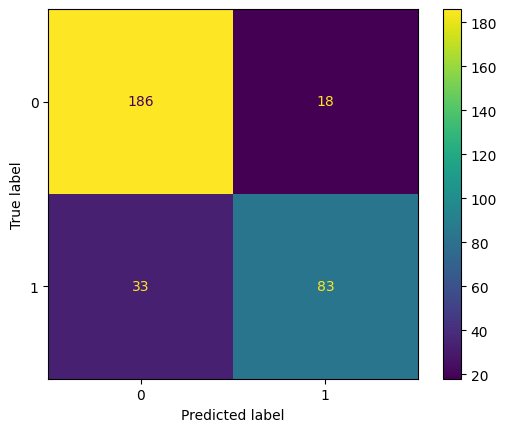

In [22]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_train_preds)).plot();

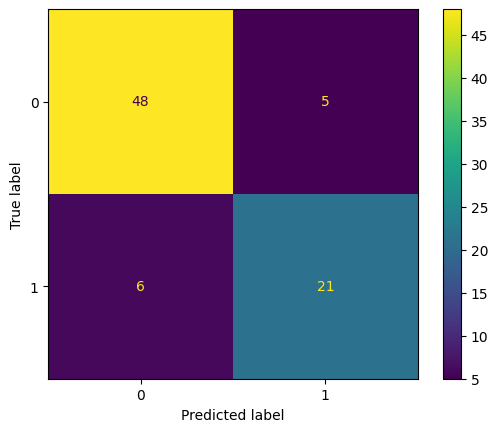

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_preds)).plot();

#### Visulaize Decsion Boundries

In [29]:
import matplotlib.pylab as pl

C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


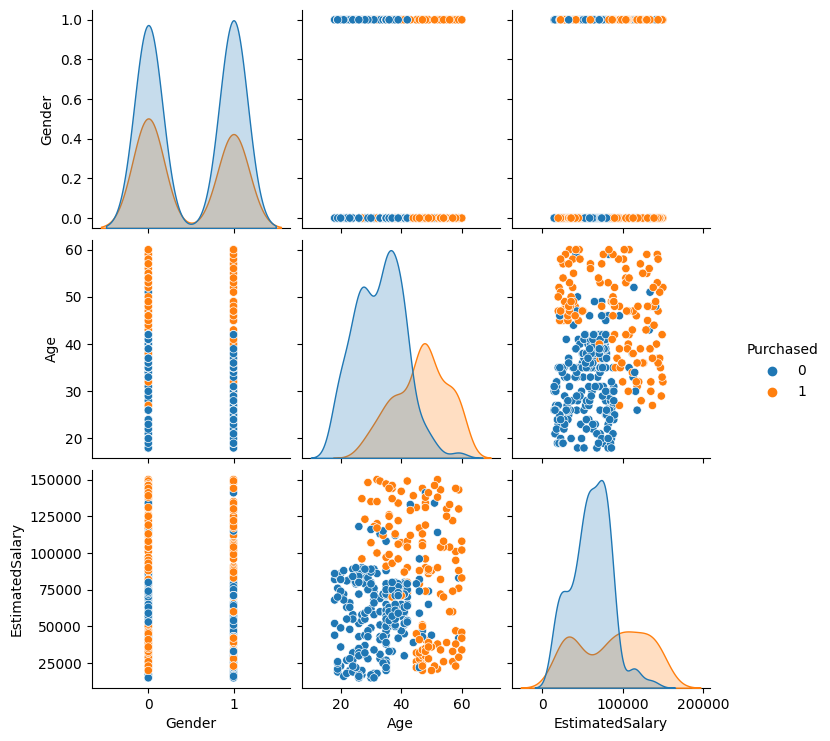

In [26]:
sns.pairplot(df,hue='Purchased')

In [27]:
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iteration 1 
train accuracy 0.83125 
test accuracy 0.8625 
iteration 2 
train accuracy 0.840625 
test accuracy 0.825 
iteration 5 
train accuracy 0.83125 
test accuracy 0.8625 
iteration 10 
train accuracy 0.85625 
test accuracy 0.875 
iteration 100 
train accuracy 0.85625 
test accuracy 0.875 
iteration 1000 
train accuracy 0.85625 
test accuracy 0.875 


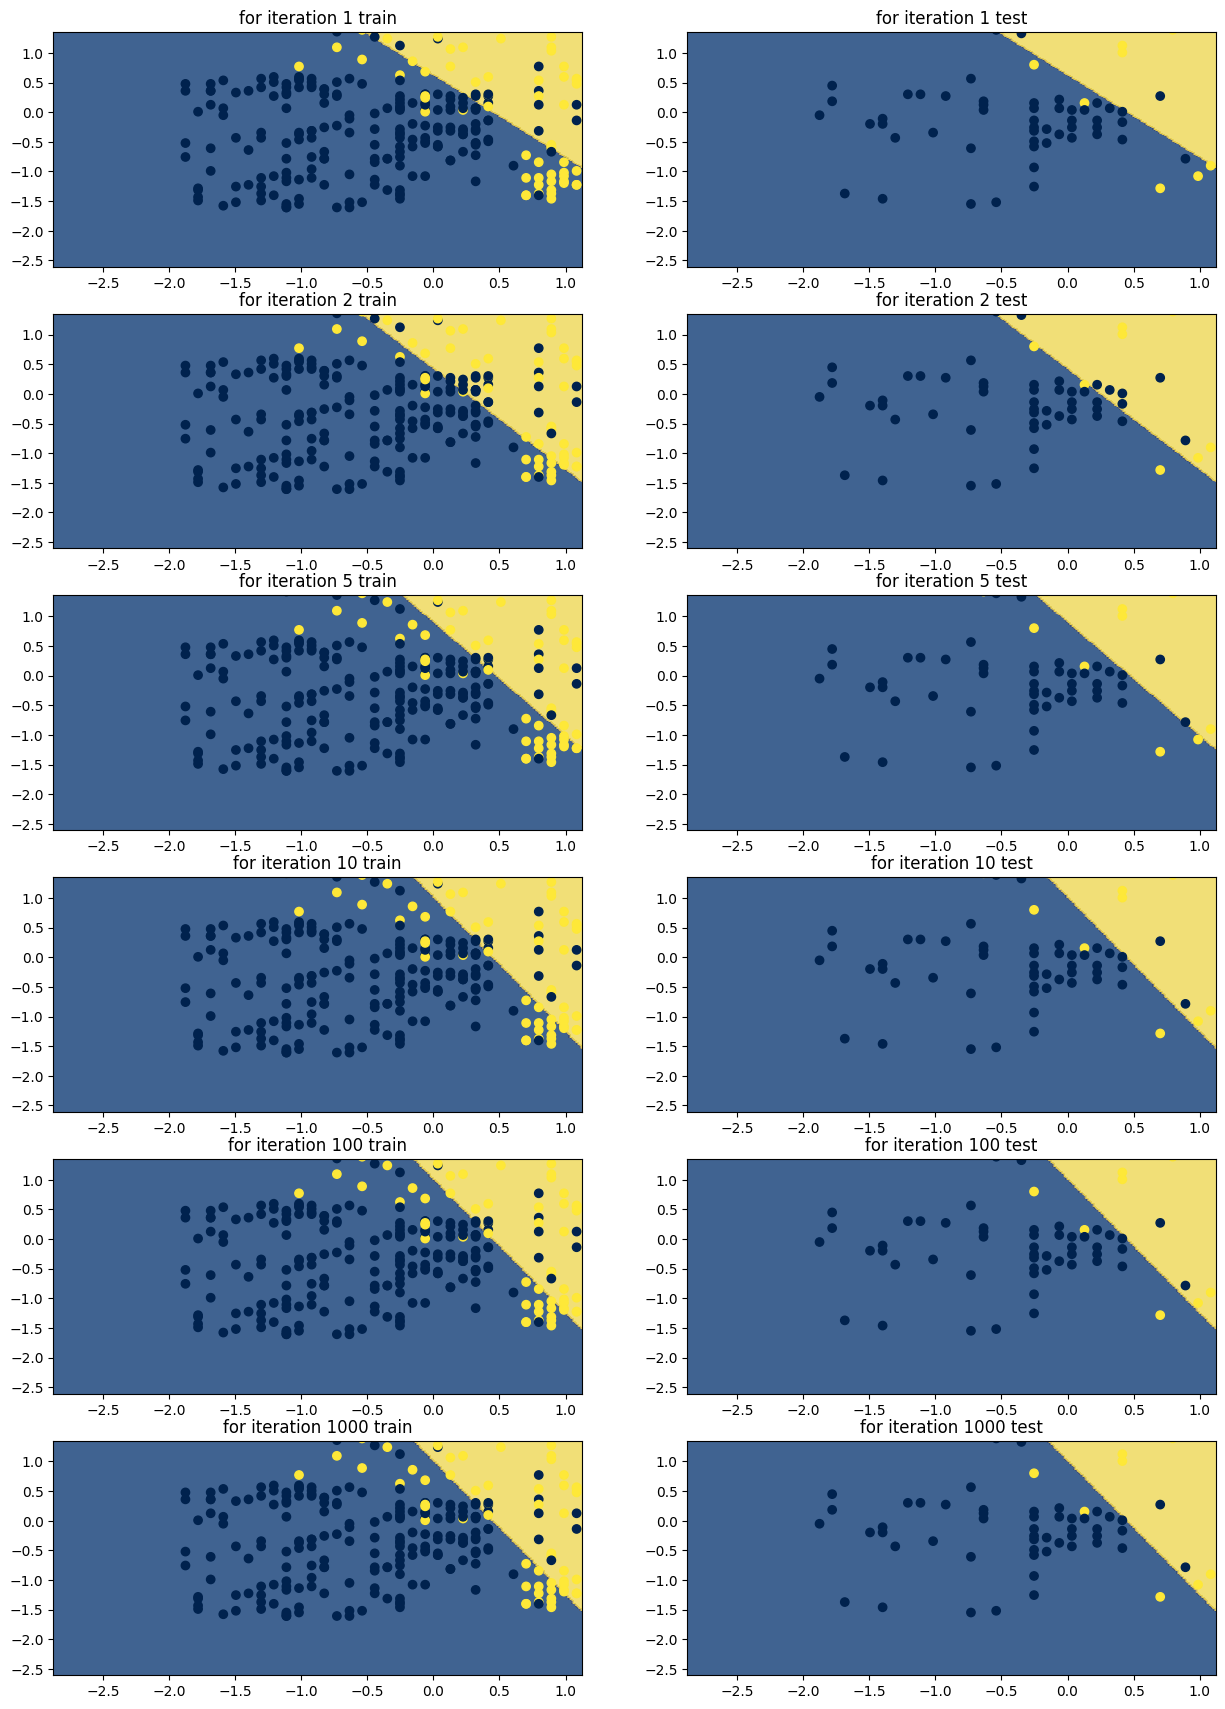

In [58]:
from matplotlib import cm

age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2].max()-1
age_grid, es_grid = np.meshgrid(np.arange(age_min,age_max,0.02),np.arange(es_min,es_max,0.02))

pl.figure(figsize=(15,25))
pl.set_cmap(pl.cm.cividis)

i = 1

for it in [1,2,5,10,100,1000]:
    clf = LogisticRegression(max_iter=it,solver='sag')
    clf.fit(X_train[:,1:],y_train)

    train_preds = clf.predict(X_train[:,1:])
    test_preds = clf.predict(X_test[:,1:])

    print(f'iteration {it} ')
    print(f'train accuracy {accuracy_score(y_train,train_preds)} ')
    print(f'test accuracy {accuracy_score(y_test,test_preds)} ')
   
    pl.subplot(7,2,i)
    
    #z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])  # n.c_[age_grid.ravel(),es_grid.ravel()] = np.array([age_grid.ravel(),es_grid.ravel()]).T
    z = clf.predict(np.array([age_grid.ravel(),es_grid.ravel()]).T)  # n.c_[age_grid.ravel(),es_grid.ravel()] = np.array([age_grid.ravel(),es_grid.ravel()]).T
    z = z.reshape(age_grid.shape)
    
    pl.set_cmap(pl.cm.cividis)
    pl.contourf(age_grid,es_grid,z,alpha=0.75)
    pl.axis('tight')

    pl.scatter(X_train[:,1],X_train[:,2],c=y_train)
    pl.title(f'for iteration {it} train')

    i +=1
    pl.subplot(7,2,i)
    pl.set_cmap(pl.cm.cividis)
    
    pl.contourf(age_grid,es_grid,z,alpha=0.75)
    pl.axis('tight')
    
    pl.scatter(X_test[:,1],X_test[:,2],c=y_test)
    pl.title(f'for iteration {it} test')
    i +=1
    
plt.show()